<a href="https://colab.research.google.com/github/ankit15697/haberman-dataset-analysis/blob/master/haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set was downloaded from Kaggle : [Haberman Data Set](https://www.kaggle.com/gilsousa/habermans-survival-data-set)



In [ ]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading data set
# taking pandas data
df = pd.read_csv("/content/drive/My Drive/data-sets/haberman.csv", names = ["age", "treatment_year", "positive_nodes", "survival_status"])

#printing Data information
print (df.info)
print (df.dtypes)



<bound method DataFrame.info of      age  treatment_year  positive_nodes  survival_status
0     30              64               1                1
1     30              62               3                1
2     30              65               0                1
3     31              59               2                1
4     31              65               4                1
..   ...             ...             ...              ...
301   75              62               1                1
302   76              67               0                1
303   77              65               3                1
304   78              65               1                2
305   83              58               2                2

[306 rows x 4 columns]>
age                int64
treatment_year     int64
positive_nodes     int64
survival_status    int64
dtype: object


After taking data I came to know that in dataset there is no missing value and the data of death after 5 is not in categorical data.
I have to first convert this data into categorical data in format of 0 and 1

In [ ]:
# converting data into categorical data form
df.survival_status = df.survival_status.map({1 : "YES", 2 : "NO"})
df.survival_status = df.survival_status.astype("category")


After converting survival status into categorical form.
My data is ready for analysis. I will further do analysis of this data.

In [ ]:
# Prediction about result with the help of datadf

# printing count of YES and NO
print (df.iloc[:,-1].value_counts())

# printing percentage of YES and NO

print (df.iloc[:,-1].value_counts(normalize = True))

YES    225
NO      81
Name: survival_status, dtype: int64
YES    0.735294
NO     0.264706
Name: survival_status, dtype: float64


In this data set 73.52 percent patient will survive after having cancer and 26.47 percent patient will die after having cancer

In [ ]:
# # Now plotting data into graph format

# #sns.set_style("whitegrid")
# sns.pairplot(df, hue="survival_status", size=4)
# plt.show()


**Doing Univariate Analysis**


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


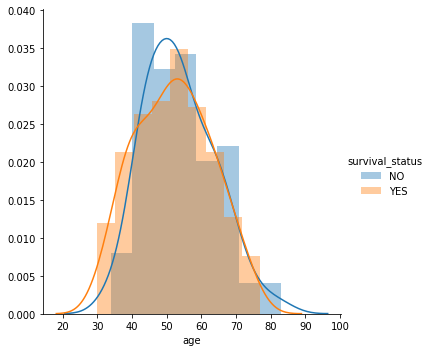

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


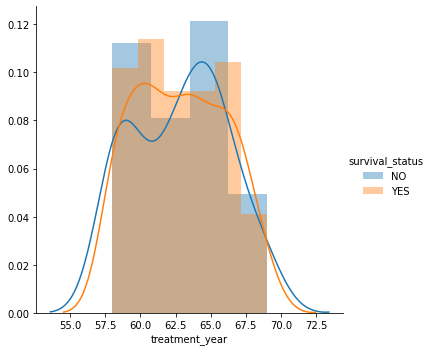

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


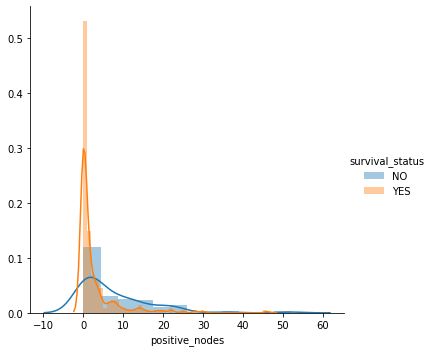

In [ ]:
# Analysis for age
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "age").add_legend();
plt.show();

#analysis for teatment year
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "treatment_year").add_legend();
plt.show();

# analysis for total number of positive nodes
#analysis for teatment year
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "positive_nodes").add_legend();
plt.show();


**Observations from Univariate Analysis** : 
From univariate analysis it comes into picture that positive nodes matters for the result rest are overlapping
If positive nodes are greater than 5 then there are high chances that patient will die.

**cumulative distribution function (cdf)**
Now analysis by CDF


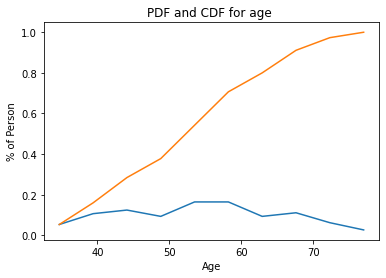

In [ ]:
# Data analysis for Age
counts, bin_edges = np.histogram(df.loc[df["survival_status"] == "YES"]["age"], bins = 10, density = True)
pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)
plt.title("PDF and CDF for age ")
plt.ylabel("% of Person")
plt.xlabel("Age")

# Plot for the Persons who will live
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

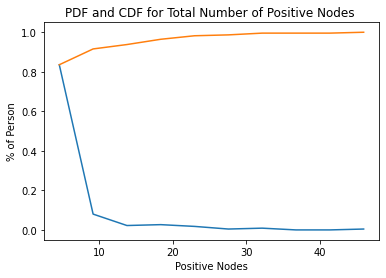

In [ ]:
# Data analysis for Number of positive nodes
counts, bin_edges = np.histogram(df.loc[df["survival_status"] == "YES"]["positive_nodes"], bins = 10, density = True)
pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)
plt.title("PDF and CDF for Total Number of Positive Nodes ")
plt.ylabel("% of Person")
plt.xlabel("Positive Nodes")

# Plot for the Persons who will live
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

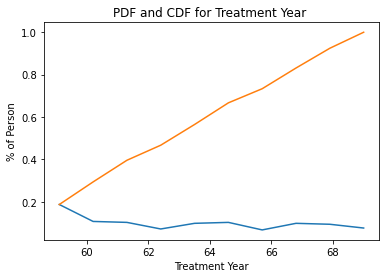

In [ ]:
# Data analysis for Number of Treatment Year
counts, bin_edges = np.histogram(df.loc[df["survival_status"] == "YES"]["treatment_year"], bins = 10, density = True)
pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)
plt.title("PDF and CDF for Treatment Year ")
plt.ylabel("% of Person")
plt.xlabel("Treatment Year")

# Plot for the Persons who will live
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

**Observations from PDF and CDF Analysis**:


1.   From analysis of Age I came to the ccunclusion that there are total 85 percent patients whose age is less that 65.
2.   If there are less than 10 positive nodes then the chances of survival are greater than 80 percent







**Box Plot**

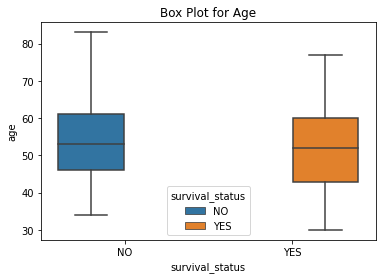

In [ ]:
# Box plot for age
sns.boxplot(data = df, x = "survival_status", y = "age", hue = "survival_status").set_title("Box Plot for Age")
plt.show()

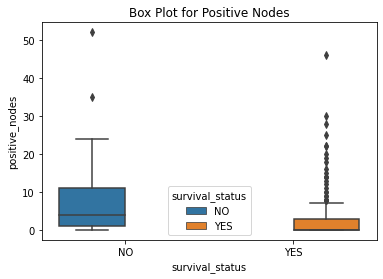

In [ ]:
# Box plot for Treatment Year
sns.boxplot(data = df, x = "survival_status", y = "positive_nodes", hue = "survival_status").set_title("Box Plot for Positive Nodes")
plt.show()

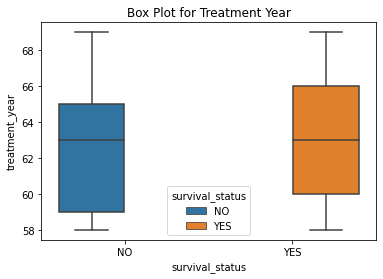

In [ ]:
# Box plot for Treatment Year
sns.boxplot(data = df, x = "survival_status", y = "treatment_year", hue = "survival_status").set_title("Box Plot for Treatment Year")
plt.show()

**Observations from Box Plot**
There is no meaningful result coming by analysis of box plot only two canclusion are coming :


1. After the year 1965 there are more patients who are surviving that before 
2.   If there are five nodes then there are more chances that person will die.

**Violin Plot**

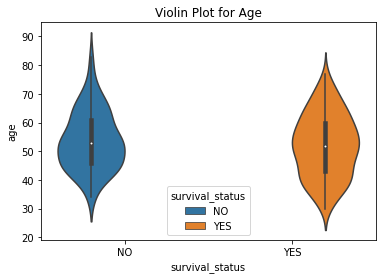

In [ ]:
# Violin plot for age
sns.violinplot(data = df, x = "survival_status", y = "age", hue = "survival_status").set_title("Violin Plot for Age")
plt.show()

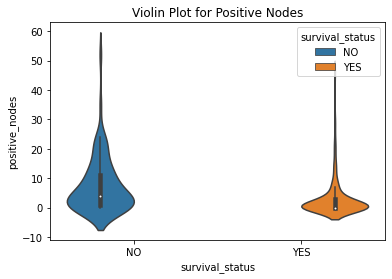

In [ ]:
# Violin plot for Positive Nodes
sns.violinplot(data = df, x = "survival_status", y = "positive_nodes", hue = "survival_status").set_title("Violin Plot for Positive Nodes")
plt.show()

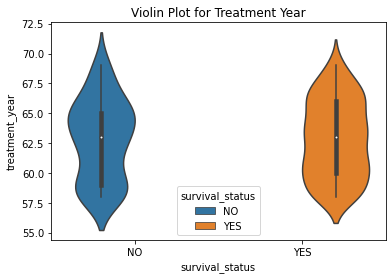

In [ ]:
# Violin plot for Treatment Year
sns.violinplot(data = df, x = "survival_status", y = "treatment_year", hue = "survival_status").set_title("Violin Plot for Treatment Year")
plt.show()

**Observations from Haberman Data Set Analysis**


1.   If there are positive nodes greater than 5 then there are more chances that patient will dies.
2. In the Duration of 1960 to 1964 most of the patient died.
3. There were most of the overlapping nodes so no more information can be extracted.  

